___Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.___

### Forecast the Airlines Passengers

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_airlines = pd.read_excel('Airlines+Data.xlsx')
df_airlines

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [4]:
df_airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [5]:
df_airlines.isnull().sum()

Month         0
Passengers    0
dtype: int64

<AxesSubplot:>

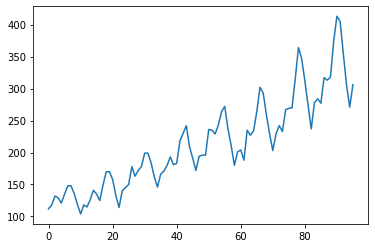

In [6]:
df_airlines.Passengers.plot()

In [7]:
df_airlines.rename(columns = {'Month' : 'date'}, inplace = True)

df_airlines["month"] = df_airlines.date.dt.strftime("%b") # month extraction
df_airlines["year"] = df_airlines.date.dt.strftime("%Y") # year extraction

df_airlines.head()

,date,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995


#### Dummy variable creation for 'month' column, each unique month will have a column, 12 columns will represent 12 months

In [8]:
month_dummies = pd.DataFrame(pd.get_dummies(df_airlines['month']))
month_dummies.head()

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0


In [9]:
month_dummies = month_dummies.iloc[:, [4, 3, 7, 0, 8, 6, 5, 1, 11, 10, 9, 2]]
month_dummies.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


In [10]:
df_airlines_final = pd.concat([df_airlines, month_dummies], axis=1)
df_airlines_final.head()

,date,Passengers,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1995-01-01,112,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-01,129,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,0,0,0,0,1,0,0,0,0,0,0,0


In [11]:
df_airlines_final['t'] = np.arange(1, 97)
df_airlines_final["t_Squared"] = df_airlines_final["t"]*df_airlines_final["t"]
df_airlines_final["log_passengers"] = np.log(df_airlines["Passengers"])
df_airlines_final.head()

,date,Passengers,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_Squared,log_passengers
0,1995-01-01,112,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0,3,9,4.882802
3,1995-04-01,129,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,May,1995,0,0,0,0,1,0,0,0,0,0,0,0,5,25,4.795791


___Data visualization___

<AxesSubplot:xlabel='month', ylabel='year'>

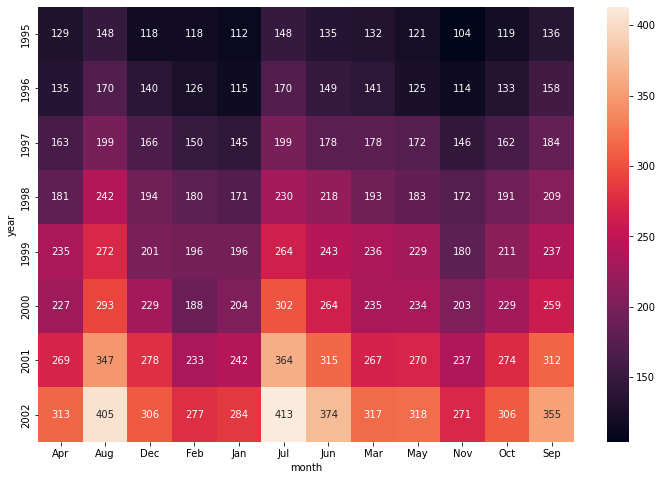

In [12]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=df_airlines_final, values="Passengers", index="year", columns="month", 
                                 aggfunc="mean", fill_value=0)
sns.heatmap(heatmap_y_month, annot=True, fmt="g")

<AxesSubplot:xlabel='year', ylabel='Passengers'>

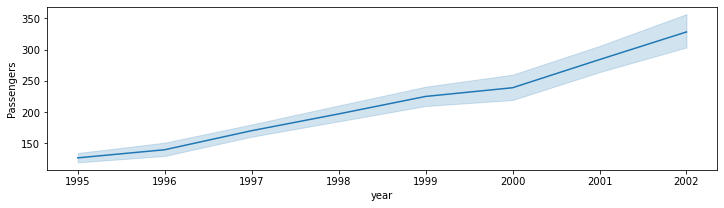

In [13]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year", y="Passengers", data=df_airlines_final)

<AxesSubplot:>

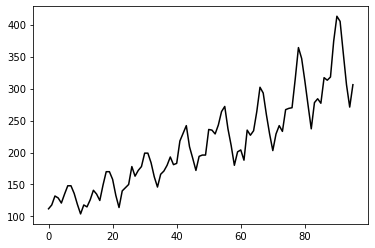

In [14]:
# Time plot

df_airlines_final.Passengers.plot(style="k")

### Model Building

In [15]:
import statsmodels.formula.api as smf 

In [16]:
# Split the data into Train and Test

Train = df_airlines_final.head(80)
Test = df_airlines_final.tail(16)
Test = Test.set_index(np.arange(1,17))

Train.head()

,date,Passengers,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_Squared,log_passengers
0,1995-01-01,112,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0,3,9,4.882802
3,1995-04-01,129,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,May,1995,0,0,0,0,1,0,0,0,0,0,0,0,5,25,4.795791


In [17]:
# Linear model

linear_model = smf.ols('Passengers~t', data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))

rmse_linear

47.542624067726734

In [18]:
# Exponential model

Exp = smf.ols('log_passengers~t', data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))

rmse_Exp

43.79373939334322

In [19]:
# Quadratic model

Quad = smf.ols('Passengers~t+t_Squared', data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t", "t_Squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))

rmse_Quad

43.6544036958425

In [20]:
# Additive seasonality model

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))

rmse_add_sea

129.26647641443307

In [21]:
# Additive Seasonality Quadratic model

add_sea_Quad = smf.ols('Passengers~t+t_Squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep',
                                                         'Oct','Nov','t','t_Squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))

rmse_add_sea_quad

23.910983570106755

In [22]:
# Multiplicative Seasonality model

Mul_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))

rmse_Mult_sea

3.0091750304956752e+103

In [23]:
# Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))

rmse_Mult_add_sea

6.1002517233291314e+147

### RMSE values for each model

In [24]:
# Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea",
                           "rmse_Mult_add_sea"]),
                           "RMSE_Values":pd.Series([rmse_linear, rmse_Exp, rmse_Quad, rmse_add_sea, rmse_add_sea_quad, 
                                                    rmse_Mult_sea, rmse_Mult_add_sea])}
table_rmse = pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,2.391098e+01
2,rmse_Quad,4.365440e+01
1,rmse_Exp,4.379374e+01
0,rmse_linear,4.754262e+01
3,rmse_add_sea,1.292665e+02
5,rmse_Mult_sea,3.009175e+103
6,rmse_Mult_add_sea,6.100252e+147


### ___'Additive Seasonality Quadratic model' has the least value of RMSE among the models prepared___

In [25]:
# Build the model on entire data set

model_final = smf.ols('Passengers~t+t_Squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=df_airlines_final).fit()